In [1]:
import pandas as pd

df = pd.read_csv("results/all-scores.csv")
# print(df)
print(df.head().to_markdown(index=False))

| model                  | hardware              |   total_params |   total_samples |   elapsed_time |      sps |   batch_size |   max_length | task           |   score.rouge.rouge1 |   score.sacreblue.score |   score.sari.sari |   score.em.exact_match |   utilization.total_memory |   utilization.memory_used |   utilization.cuda_allocated |   utilization.cuda_reserved |   utilization.ram_usage |
|:-----------------------|:----------------------|---------------:|----------------:|---------------:|---------:|-------------:|-------------:|:---------------|---------------------:|------------------------:|------------------:|-----------------------:|---------------------------:|--------------------------:|-----------------------------:|----------------------------:|------------------------:|
| grammarly/coedit-large | HomeDesktop (RTX3080) |      783092736 |            2031 |       187.235  | 10.8474  |           20 |          350 | gec            |             0.94173  |                 75

In [2]:
aggregated_df = df.groupby(["model"]).agg(
    {
        "total_params": [("params, B", lambda x: (x.iloc[0] / 1024**3))],
        "hardware": "first",
        "score.rouge.rouge1": [
            ("mean", lambda x: x.mean()),
            # ("median", lambda x: x.median()),
            ("max", lambda x: x.max()),
            ("min", lambda x: x.min()),
            # ("quantile_95", lambda x: x.quantile(0.95)),
        ],
        "score.sacreblue.score": [
            ("mean", lambda x: x.mean()),
            # ("median", lambda x: x.median()),
            ("max", lambda x: x.max()),
            ("min", lambda x: x.min()),
            # ("quantile_95", lambda x: x.quantile(0.95)),
        ],
        "score.sari.sari": [
            ("mean", lambda x: x.mean()),
            # ("median", lambda x: x.median()),
            ("max", lambda x: x.max()),
            ("min", lambda x: x.min()),
            # ("quantile_95", lambda x: x.quantile(0.95)),
        ],
        "score.em.exact_match": [
            ("mean", lambda x: x.mean()),
            # ("median", lambda x: x.median()),
            # ("max", lambda x: x.max()),
            # ("min", lambda x: x.min()),
            # ("quantile_95", lambda x: x.quantile(0.95)),
        ],
    }
)
aggregated_df = aggregated_df.rename(columns={"score.rouge.rouge1": "rouge1"})
aggregated_df = aggregated_df.rename(columns={"score.sacreblue.score": "sacreblue"})
aggregated_df = aggregated_df.rename(columns={"score.sari.sari": "sari"})
aggregated_df = aggregated_df.rename(columns={"score.em.exact_match": "em"})
aggregated_df.head(10)

total_params               hardware    rouge1  \
                                params, B                  first      mean   
model                                                                        
facebook/bart-large              0.378388  HomeDesktop (RTX3080)  0.696706   
google-t5/t5-large               0.687007  HomeDesktop (RTX3080)  0.360717   
grammarly/coedit-large           0.729312  HomeDesktop (RTX3080)  0.876152   
iliazlobin/bart-large-coedit     0.378388  HomeDesktop (RTX3080)  0.788588   
iliazlobin/gemma-2b-coedit       2.334055  HomeDesktop (RTX3080)  0.800645   
iliazlobin/gpt2-large-coedit     0.720872  HomeDesktop (RTX3080)  0.783665   
iliazlobin/phi-2-coedit          2.588782  HomeDesktop (RTX3080)  0.803408   

                                                  sacreblue             \
                                   max       min       mean        max   
model                                                                    
facebook/bart-large           0.833521  0.467879  46.612458  69.047825   
google-t5/t5-large            0.440694  0.298742  13.379049  21.384576   
grammarly/coedit-large        0.994071  0.666232  73.886621  97.988385   
iliazlobin/bart-large-coedit  0.944228  0.511653  58.722832  88.348703   
iliazlobin/gemma-2b-coedit    0.972685  0.533252  62.085454  92.404462   
iliazlobin/gpt2-large-coedit  0.948045  0.490718  59.427229  90.663088   
iliazlobin/phi-2-coedit       0.973337  0.538062  62.179372  92.372952   

                                              sari                        \
                                    min       mean        max        min   
model                                                                      
facebook/bart-large           12.002908  52.399319  58.964611  42.010668   
google-t5/t5-large             6.831797  36.477082  42.296055  27.617439   
grammarly/coedit-large        40.802185  79.866640  92.967020  63.141337   
iliazlobin/bart-large-coedit  14.337135  58.742721  68.251648  43.106538   
iliazlobin/gemma-2b-coedit    17.744190  66.646484  81.831890  51.008086   
iliazlobin/gpt2-large-coedit  13.662100  60.957911  73.046332  43.234104   
iliazlobin/phi-2-coedit       17.693174  66.942899  82.077604  51.322021   

                                    em  
                                  mean  
model                                   
facebook/bart-large           0.000000  
google-t5/t5-large            0.000082  
grammarly/coedit-large        0.425301  
iliazlobin/bart-large-coedit  0.033034  
iliazlobin/gemma-2b-coedit    0.199123  
iliazlobin/gpt2-large-coedit  0.074605  
iliazlobin/phi-2-coedit       0.199039

In [3]:
mean_aggregated_df = df.groupby(["model"]).agg(
    {
        "total_params": [("params, B", lambda x: (x.iloc[0] / 1024**3))],
        "hardware": "first",
        "score.rouge.rouge1": "mean",
        "score.sacreblue.score": "mean",
        "score.sari.sari": "mean",
        "score.em.exact_match": "mean",
    }
)
mean_aggregated_df = mean_aggregated_df.rename(columns={"score.rouge.rouge1": "rouge"})
mean_aggregated_df = mean_aggregated_df.rename(columns={"score.sacreblue.score": "sacreblue"})
mean_aggregated_df = mean_aggregated_df.rename(columns={"score.sari.sari": "sari"})
mean_aggregated_df = mean_aggregated_df.rename(columns={"score.em.exact_match": "em"})
mean_aggregated_df.columns = [col[0] for col in mean_aggregated_df.columns.values]
mean_aggregated_df.head(10)

,total_params,hardware,rouge,sacreblue,sari,em
model,,,,,,
facebook/bart-large,0.378388,HomeDesktop (RTX3080),0.696706,46.612458,52.399319,0.000000
google-t5/t5-large,0.687007,HomeDesktop (RTX3080),0.360717,13.379049,36.477082,0.000082
grammarly/coedit-large,0.729312,HomeDesktop (RTX3080),0.876152,73.886621,79.866640,0.425301
iliazlobin/bart-large-coedit,0.378388,HomeDesktop (RTX3080),0.788588,58.722832,58.742721,0.033034
iliazlobin/gemma-2b-coedit,2.334055,HomeDesktop (RTX3080),0.800645,62.085454,66.646484,0.199123
iliazlobin/gpt2-large-coedit,0.720872,HomeDesktop (RTX3080),0.783665,59.427229,60.957911,0.074605
iliazlobin/phi-2-coedit,2.588782,HomeDesktop (RTX3080),0.803408,62.179372,66.942899,0.199039


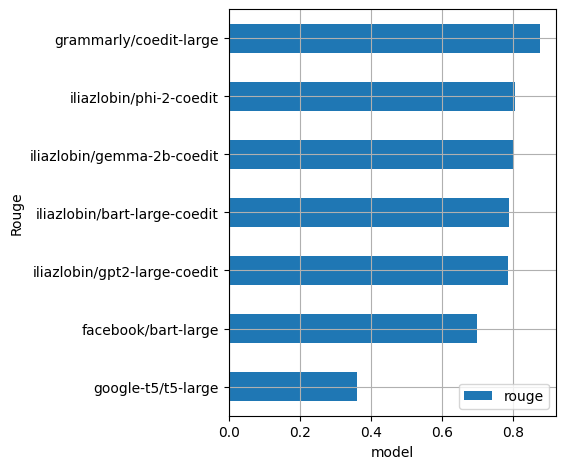

In [4]:
import matplotlib.pyplot as plt

sorted_df = mean_aggregated_df.sort_values(by=['rouge'], ascending=True)
sorted_df['rouge'].plot.barh()

# plt.rcdefaults()

plt.xlabel("model")
plt.ylabel("Rouge")
plt.legend()
plt.rc("font", size=10)

plt.grid(True)
plt.tight_layout(rect=[0.1, 2, 1, 3])

plt.show()

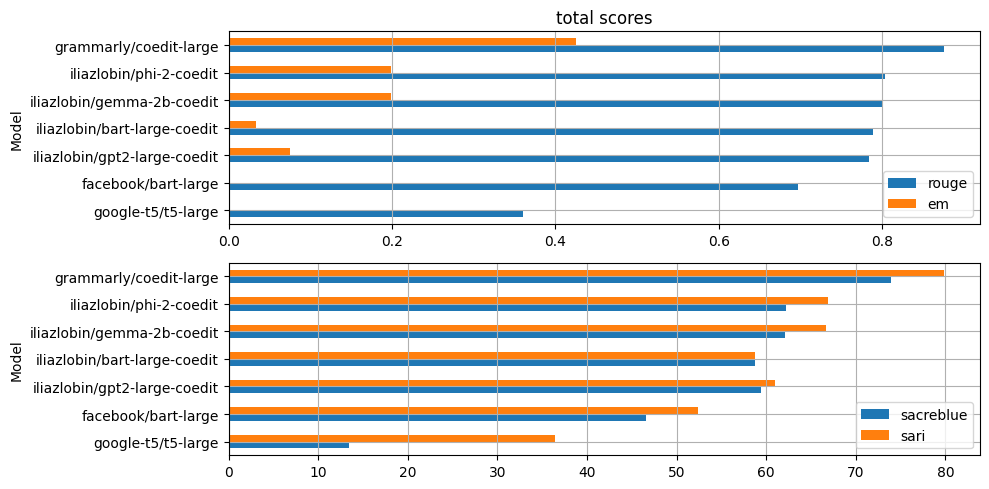

In [5]:
import matplotlib.pyplot as plt

sorted_df = mean_aggregated_df.sort_values(by=['rouge'], ascending=True)
sorted_df.head(20)

sacreblue_sari_df = sorted_df[['sacreblue', 'sari']]
# print(sacreblue_sari_df.head(20))
rouge_em_df = sorted_df[['rouge', 'em']]
# print(rouge_em_df.head(20))

fig, axs = plt.subplots(2)

rouge_em_df.plot.barh(ax=axs[0], figsize=(10,5), width=0.5)
axs[0].set_title("total scores")
axs[0].set_ylabel("Model")
axs[0].grid(True)

sacreblue_sari_df.plot.barh(ax=axs[1], figsize=(10,5), width=0.5)
axs[1].set_ylabel("Model")
axs[1].grid(True)

plt.rcdefaults()
plt.legend()
# plt.rc("font", size=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
grouped_df = df.groupby(["task", "model"]).agg(
    {
        "total_params": [('params, B', lambda x: (x.iloc[0] / 1024**3))],
        "hardware": "first",
        "score.rouge.rouge1": "first",
        "score.sacreblue.score": "first",
        "score.sari.sari": "first",
        "score.em.exact_match": "first",
    }
)
grouped_df = grouped_df.rename(columns={'score.rouge.rouge1': 'rouge'})
grouped_df = grouped_df.rename(columns={'score.sacreblue.score': 'sacreblue'})
grouped_df = grouped_df.rename(columns={'score.sari.sari': 'sari'})
grouped_df = grouped_df.rename(columns={'score.em.exact_match': 'em'})
# print(grouped_df.to_csv())
# print(grouped_df.head().to_markdown(index=False))

grouped_df.columns = [col[0] for col in grouped_df.columns.values]

grouped_df.head(10)

# grouped_df = grouped_df.reset_index()
# print(grouped_df["model"])

total_params               hardware  \
task      model                                                               
clarity   facebook/bart-large               0.378388  HomeDesktop (RTX3080)   
          google-t5/t5-large                0.687007  HomeDesktop (RTX3080)   
          grammarly/coedit-large            0.729312  HomeDesktop (RTX3080)   
          iliazlobin/bart-large-coedit      0.378388  HomeDesktop (RTX3080)   
          iliazlobin/gemma-2b-coedit        2.334055  HomeDesktop (RTX3080)   
          iliazlobin/gpt2-large-coedit      0.720872  HomeDesktop (RTX3080)   
          iliazlobin/phi-2-coedit           2.588782  HomeDesktop (RTX3080)   
coherence facebook/bart-large               0.378388  HomeDesktop (RTX3080)   
          google-t5/t5-large                0.687007  HomeDesktop (RTX3080)   
          grammarly/coedit-large            0.729312  HomeDesktop (RTX3080)   

                                           rouge  sacreblue       sari  \
task      model                                                          
clarity   facebook/bart-large           0.804121  65.302392  57.729025   
          google-t5/t5-large            0.440694  21.384576  35.361465   
          grammarly/coedit-large        0.905869  83.897849  72.515965   
          iliazlobin/bart-large-coedit  0.878349  78.748941  62.110785   
          iliazlobin/gemma-2b-coedit    0.852500  75.352178  57.732333   
          iliazlobin/gpt2-large-coedit  0.866226  78.783360  61.765588   
          iliazlobin/phi-2-coedit       0.864090  76.913153  58.415863   
coherence facebook/bart-large           0.833521  64.117972  54.833572   
          google-t5/t5-large            0.396545  19.407613  27.617439   
          grammarly/coedit-large        0.994071  97.988385  92.967020   

                                              em  
task      model                                   
clarity   facebook/bart-large           0.000000  
          google-t5/t5-large            0.000000  
          grammarly/coedit-large        0.253968  
          iliazlobin/bart-large-coedit  0.007937  
          iliazlobin/gemma-2b-coedit    0.007937  
          iliazlobin/gpt2-large-coedit  0.015873  
          iliazlobin/phi-2-coedit       0.015873  
coherence facebook/bart-large           0.000000  
          google-t5/t5-large            0.000000  
          grammarly/coedit-large        0.807910

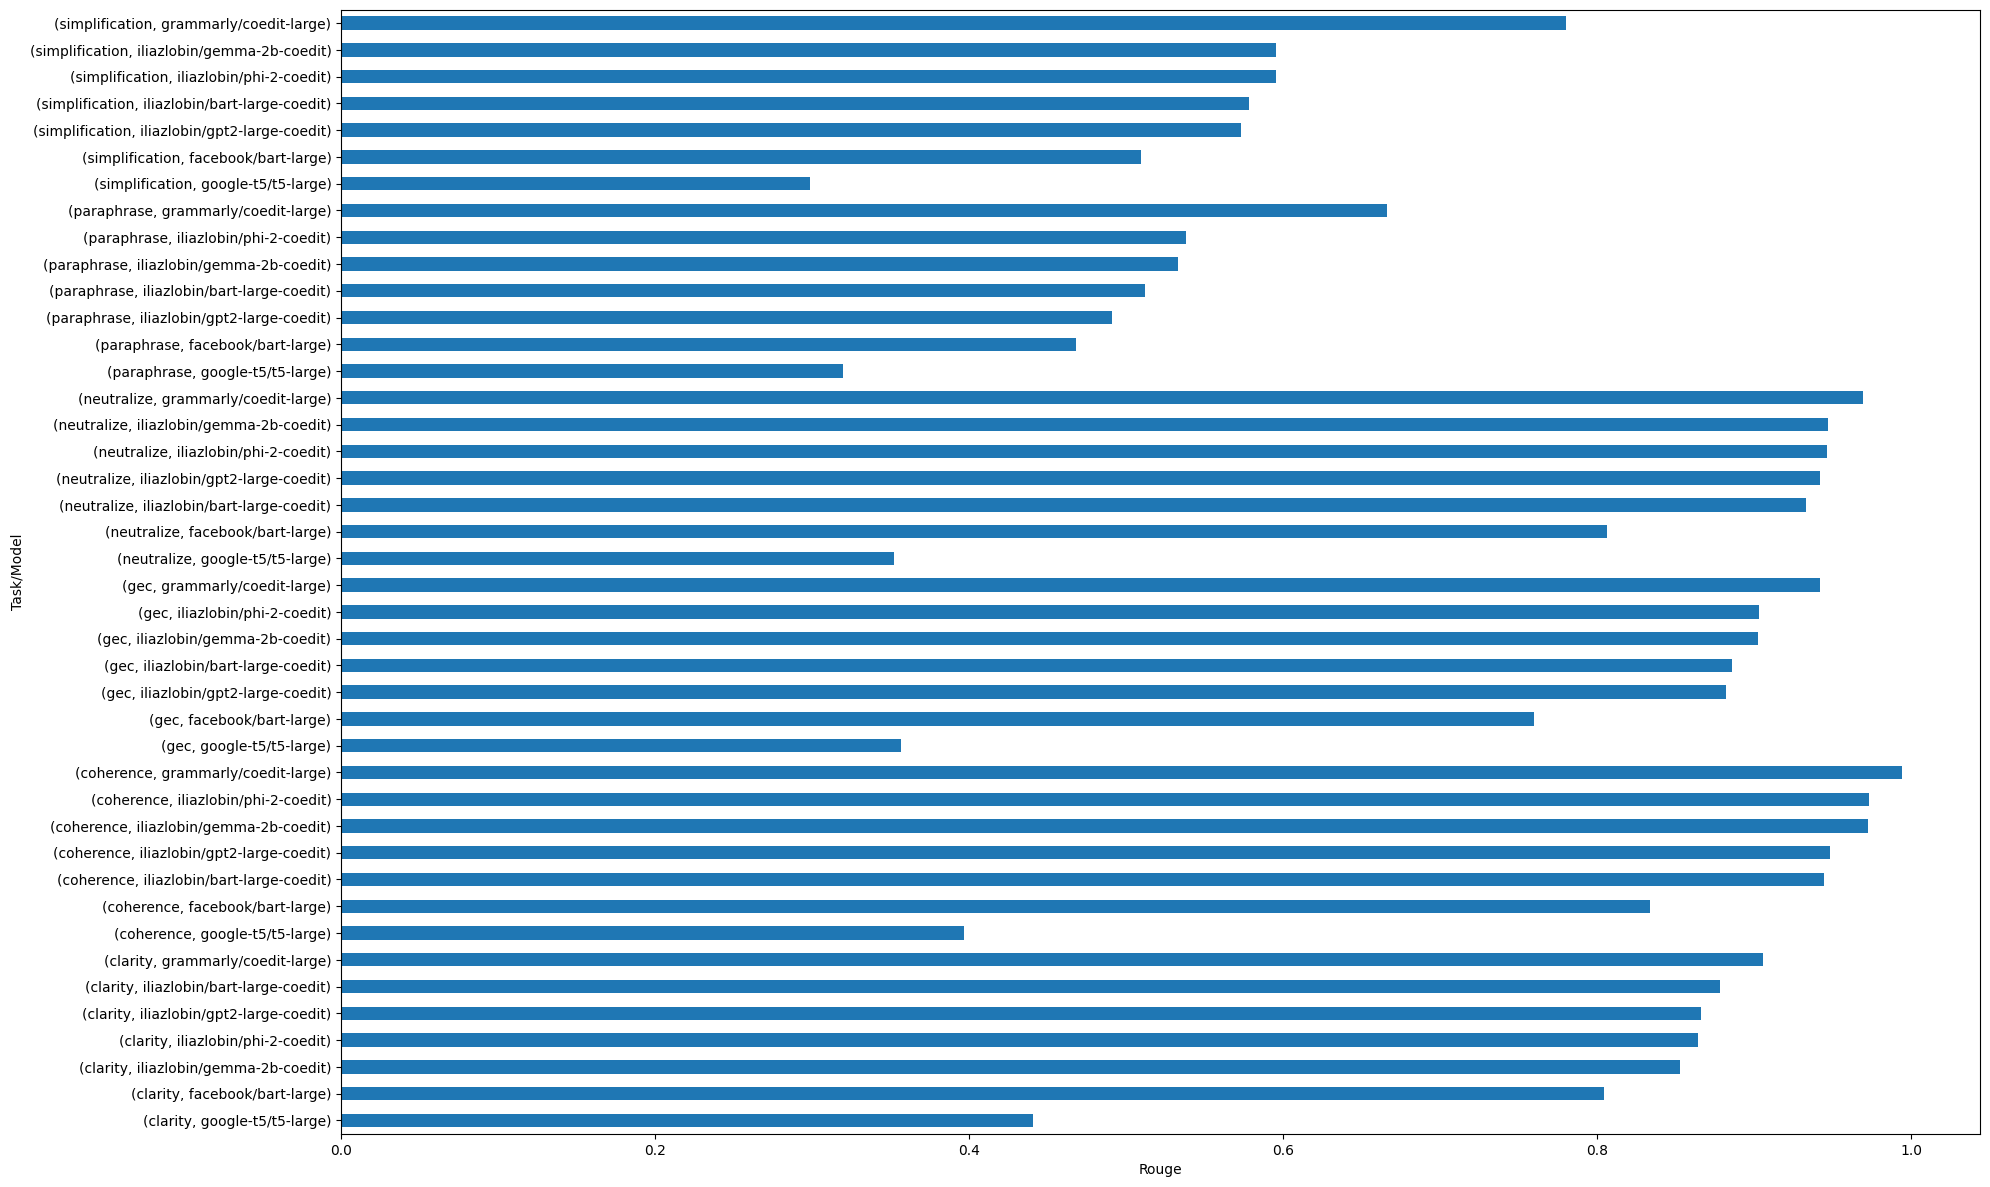

In [7]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(50,50))

sorted_df = grouped_df.sort_values(by=['task', 'rouge'], ascending=True)
# sorted_df[['rouge', 'sacreblue']].plot.barh(figsize=(40,3), width=0.5)

sorted_df['rouge'].plot.barh(figsize=(40,3), width=0.5)

# df[df["task"] == "clarity"]

# plt.rcdefaults()

plt.xlabel("Rouge")
plt.ylabel("Task/Model")
# plt.legend()
# plt.rc("font", size=10)

# plt.grid(True)
# plt.subplots_adjust(hspace=3)

plt.tight_layout(rect=[0.5, 2, 1, 6])

plt.show()

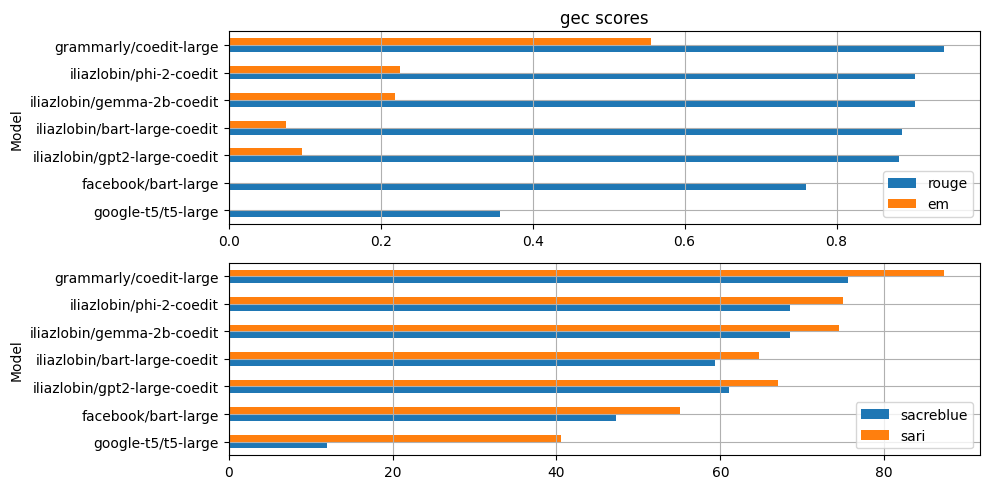

In [8]:
import matplotlib.pyplot as plt

sacreblue_sari_df = sorted_df.loc['gec'][['sacreblue', 'sari']]
# print(sacreblue_sari_df.head(20))
rouge_em_df = sorted_df.loc['gec'][['rouge', 'em']]
# print(rouge_em_df.head(20))

fig, axs = plt.subplots(2)

rouge_em_df.plot.barh(ax=axs[0], figsize=(10,5), width=0.5)
axs[0].set_title("gec scores")
axs[0].set_ylabel("Model")
axs[0].grid(True)

sacreblue_sari_df.plot.barh(ax=axs[1], figsize=(10,5), width=0.5)
axs[1].set_ylabel("Model")
axs[1].grid(True)

plt.rcdefaults()
plt.legend()
# plt.rc("font", size=10)
plt.grid(True)
plt.tight_layout()
plt.show()

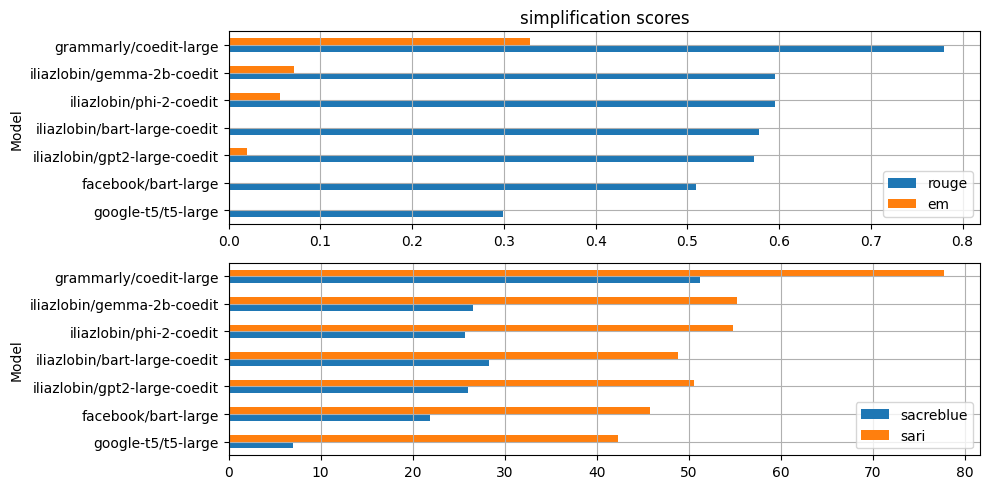

In [9]:
import matplotlib.pyplot as plt

sacreblue_sari_df = sorted_df.loc['simplification'][['sacreblue', 'sari']]
# print(sacreblue_sari_df.head(20))
rouge_em_df = sorted_df.loc['simplification'][['rouge', 'em']]
# print(rouge_em_df.head(20))

fig, axs = plt.subplots(2)

rouge_em_df.plot.barh(ax=axs[0], figsize=(10,5), width=0.5)
axs[0].set_title("simplification scores")
axs[0].set_ylabel("Model")
axs[0].grid(True)

sacreblue_sari_df.plot.barh(ax=axs[1], figsize=(10,5), width=0.5)
axs[1].set_ylabel("Model")
axs[1].grid(True)

plt.rcdefaults()
plt.legend()
# plt.rc("font", size=10)
plt.grid(True)
plt.tight_layout()
plt.show()

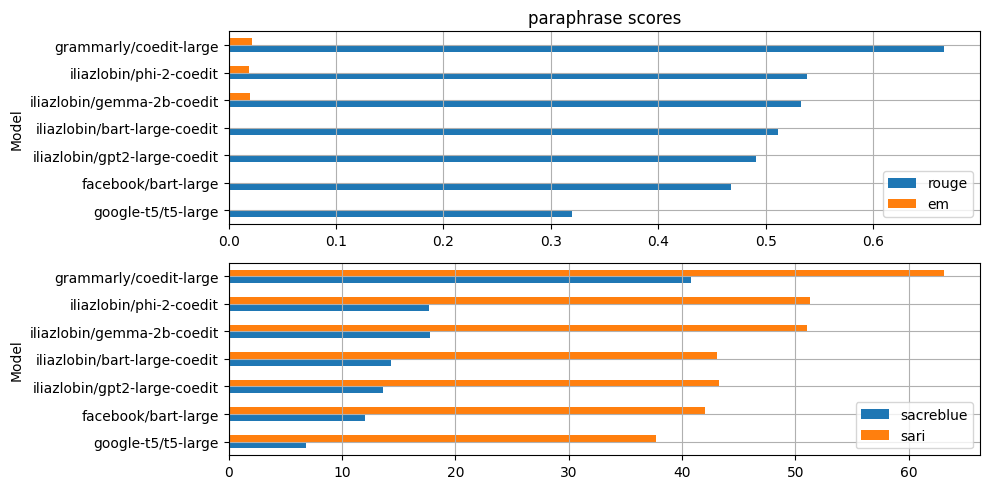

In [10]:
import matplotlib.pyplot as plt

sacreblue_sari_df = sorted_df.loc['paraphrase'][['sacreblue', 'sari']]
# print(sacreblue_sari_df.head(20))
rouge_em_df = sorted_df.loc['paraphrase'][['rouge', 'em']]
# print(rouge_em_df.head(20))

fig, axs = plt.subplots(2)

rouge_em_df.plot.barh(ax=axs[0], figsize=(10,5), width=0.5)
axs[0].set_title("paraphrase scores")
axs[0].set_ylabel("Model")
axs[0].grid(True)

sacreblue_sari_df.plot.barh(ax=axs[1], figsize=(10,5), width=0.5)
axs[1].set_ylabel("Model")
axs[1].grid(True)

plt.rcdefaults()
plt.legend()
# plt.rc("font", size=10)
plt.grid(True)
plt.tight_layout()
plt.show()

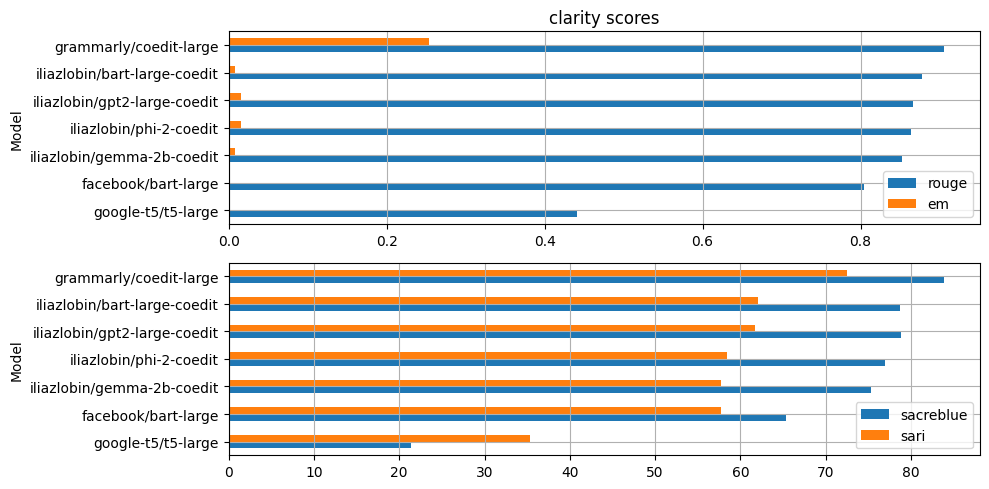

In [11]:
import matplotlib.pyplot as plt

sacreblue_sari_df = sorted_df.loc['clarity'][['sacreblue', 'sari']]
# print(sacreblue_sari_df.head(20))
rouge_em_df = sorted_df.loc['clarity'][['rouge', 'em']]
# print(rouge_em_df.head(20))

fig, axs = plt.subplots(2)

rouge_em_df.plot.barh(ax=axs[0], figsize=(10,5), width=0.5)
axs[0].set_title("clarity scores")
axs[0].set_ylabel("Model")
axs[0].grid(True)

sacreblue_sari_df.plot.barh(ax=axs[1], figsize=(10,5), width=0.5)
axs[1].set_ylabel("Model")
axs[1].grid(True)

plt.rcdefaults()
plt.legend()
# plt.rc("font", size=10)
plt.grid(True)
plt.tight_layout()
plt.show()

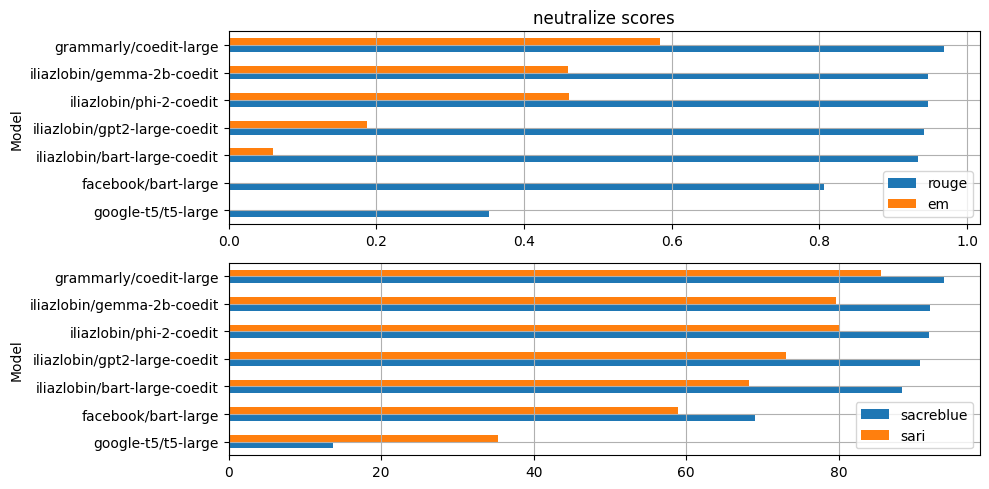

In [12]:
import matplotlib.pyplot as plt

sacreblue_sari_df = sorted_df.loc['neutralize'][['sacreblue', 'sari']]
# print(sacreblue_sari_df.head(20))
rouge_em_df = sorted_df.loc['neutralize'][['rouge', 'em']]
# print(rouge_em_df.head(20))

fig, axs = plt.subplots(2)

rouge_em_df.plot.barh(ax=axs[0], figsize=(10,5), width=0.5)
axs[0].set_title("neutralize scores")
axs[0].set_ylabel("Model")
axs[0].grid(True)

sacreblue_sari_df.plot.barh(ax=axs[1], figsize=(10,5), width=0.5)
axs[1].set_ylabel("Model")
axs[1].grid(True)

plt.rcdefaults()
plt.legend()
# plt.rc("font", size=10)
plt.grid(True)
plt.tight_layout()
plt.show()

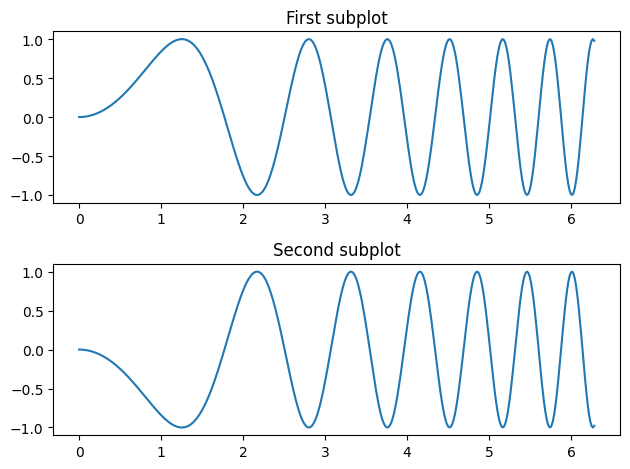

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Create a figure and a 2x1 grid of subplots
fig, axs = plt.subplots(2)

# Plot data on each subplot
axs[0].plot(x, y)
axs[0].set_title('First subplot')
axs[1].plot(x, -y)
axs[1].set_title('Second subplot')

# Display the figure
plt.tight_layout()
plt.show()

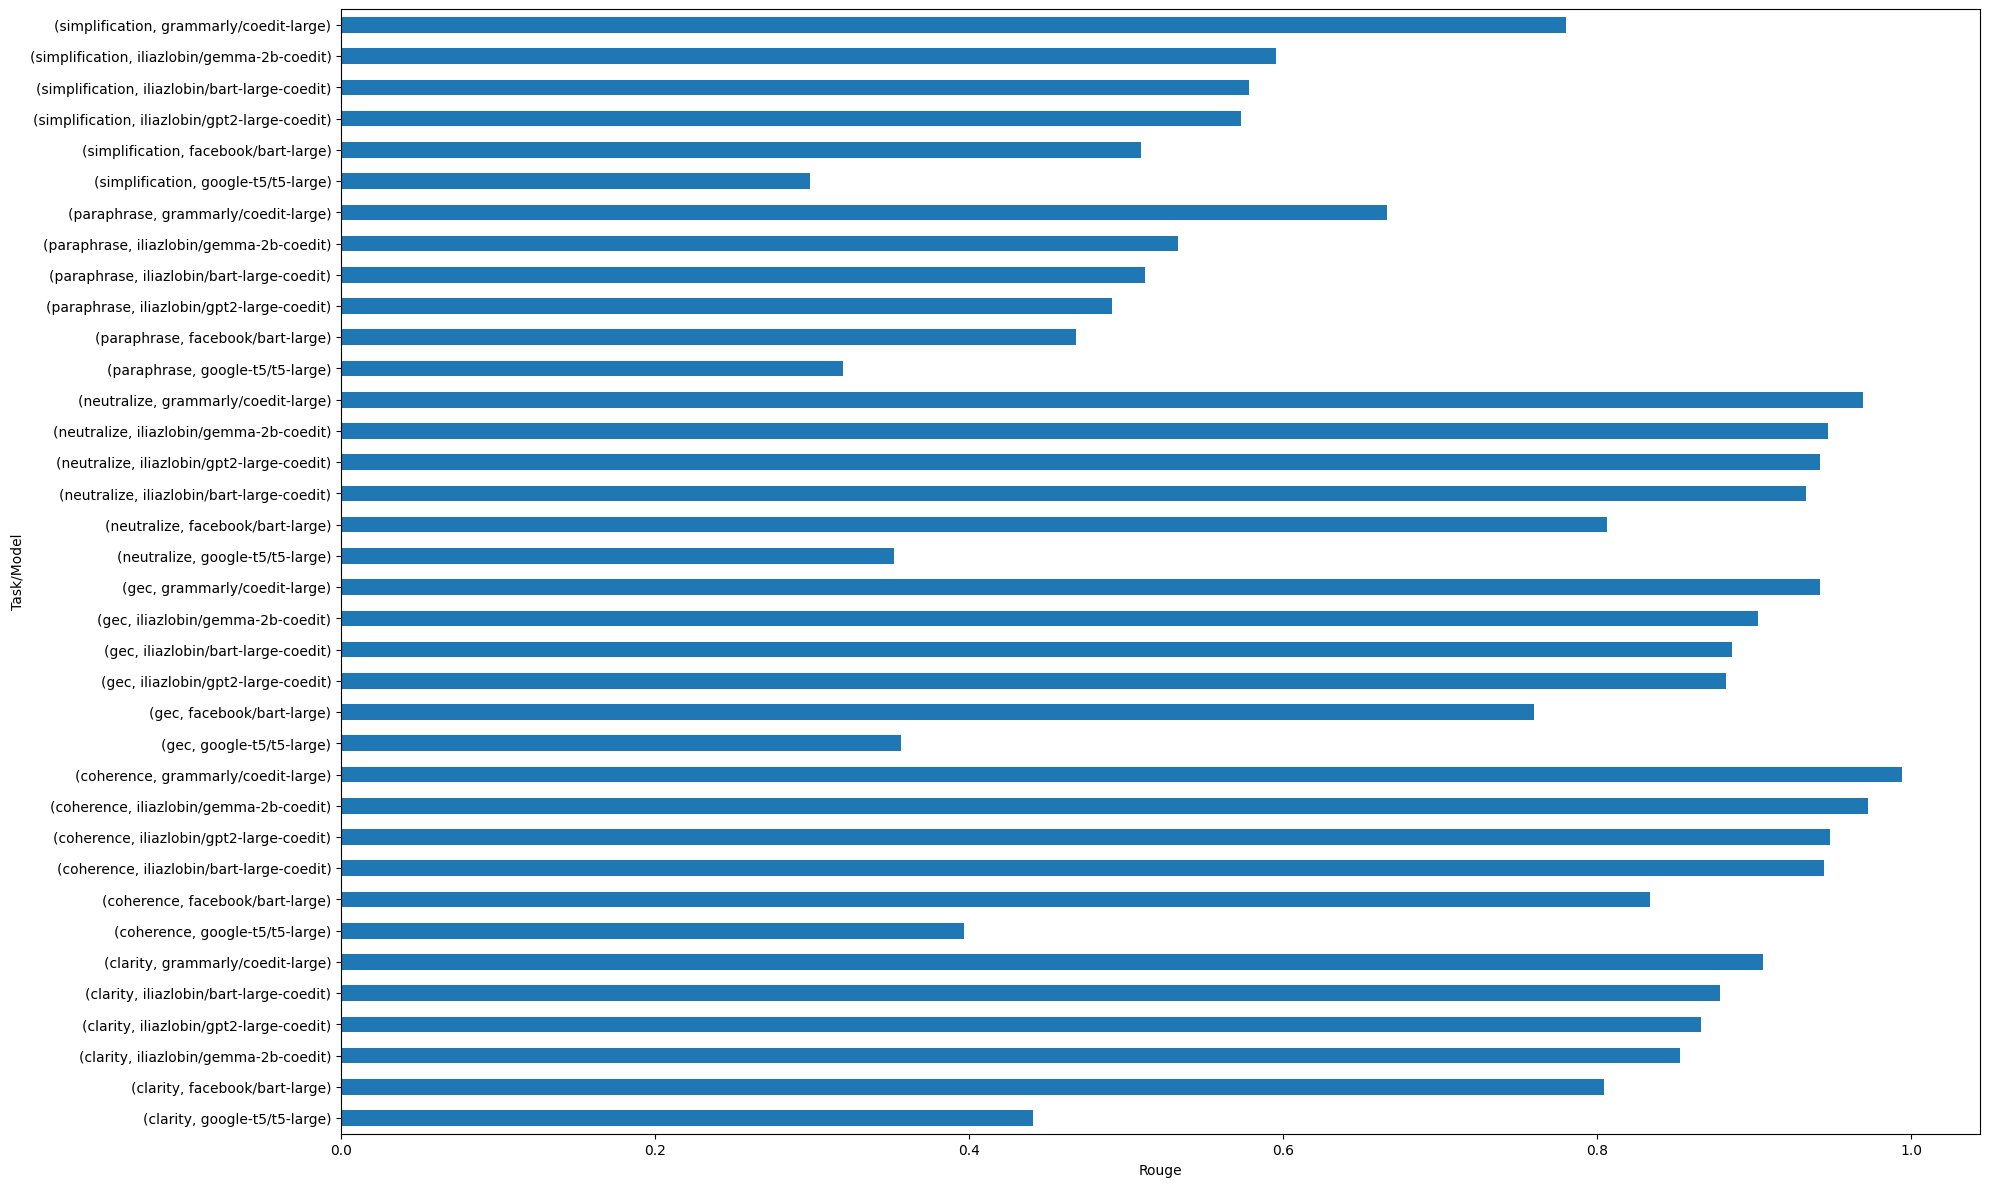

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(50,50))

sorted_df = grouped_df.sort_values(by=['task', 'rouge'], ascending=True)
# sorted_df[['rouge', 'sacreblue']].plot.barh(figsize=(40,3), width=0.5)

sorted_df['rouge'].plot.barh(figsize=(40,3), width=0.5)

# df[df["task"] == "clarity"]

# plt.rcdefaults()

plt.xlabel("Rouge")
plt.ylabel("Task/Model")
# plt.legend()
# plt.rc("font", size=10)

# plt.grid(True)
# plt.subplots_adjust(hspace=3)

plt.tight_layout(rect=[0.5, 2, 1, 6])

plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

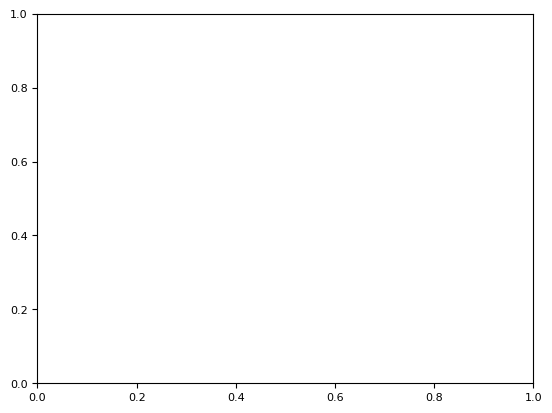

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# grouped_df = grouped_df.sort_values('rouge')

# x_labels = [f"{model.split('/')[1]}\n{instance}\nTP={tp}" for model, instance, tp in zip(unique_groups_with_best_latency['Model Id'],
#                                                                        unique_groups_with_best_latency['Instance'],
#                                                                        unique_groups_with_best_latency['Tensor parallelism degree'])]


# x_labels = [f"{model}" for model in grouped_df["model"]]

x = range(len(grouped_df))
width = 0.2

font = {"family": "normal", "size": 8}
plt.rc("font", size=8)

ax = grouped_df.plot.bar(y='rouge', rot=0, figsize=(10, 5))

plt.bar(x, grouped_df['rouge'], width, label="rouge")
# plt.bar(x, grouped_df["retailPrice"], width, label="Avg")

plt.xlabel("Region/Location")
plt.ylabel("Spot price, $")
plt.title(f"NC24 (A100) VM Spot price")
# plt.xticks([i  for i in x], x_labels)
plt.legend()
plt.grid(True)
plt.tight_layout(rect=[0.1, 0, 3, 1])
plt.show()

In [ ]:
grouped_df = df.groupby(["model"]).agg(
    {
        "total_params": [('params, B', lambda x: (x.iloc[0] / 1024**3))],
        "hardware": "first",
        "score.rouge.rouge1": [
            ("mean", lambda x: x.mean()),
            # ("median", lambda x: x.median()),
            ("max", lambda x: x.max()),
            ("min", lambda x: x.min()),
            # ("quantile_95", lambda x: x.quantile(0.95)),
        ],
        "score.sacreblue.score": [
            ("mean", lambda x: x.mean()),
            # ("median", lambda x: x.median()),
            ("max", lambda x: x.max()),
            ("min", lambda x: x.min()),
            # ("quantile_95", lambda x: x.quantile(0.95)),
        ],
        "score.sari.sari": [
            ("mean", lambda x: x.mean()),
            # ("median", lambda x: x.median()),
            ("max", lambda x: x.max()),
            ("min", lambda x: x.min()),
            # ("quantile_95", lambda x: x.quantile(0.95)),
        ],
        "score.em.exact_match": [
            ("mean", lambda x: x.mean()),
            # ("median", lambda x: x.median()),
            # ("max", lambda x: x.max()),
            # ("min", lambda x: x.min()),
            # ("quantile_95", lambda x: x.quantile(0.95)),
        ],
    }
)
grouped_df = grouped_df.rename(columns={'score.rouge.rouge1': 'rouge1'})
grouped_df = grouped_df.rename(columns={'score.sacreblue.score': 'sacreblue'})
grouped_df = grouped_df.rename(columns={'score.sari.sari': 'sari'})
grouped_df = grouped_df.rename(columns={'score.em.exact_match': 'em'})
grouped_df.head(10)

total_params               hardware    rouge1  \
                                params, B                  first      mean   
model                                                                        
facebook/bart-large              0.378388  HomeDesktop (RTX3080)  0.696706   
google-t5/t5-large               0.687007  HomeDesktop (RTX3080)  0.360717   
grammarly/coedit-large           0.729312  HomeDesktop (RTX3080)  0.876152   
iliazlobin/bart-large-coedit     0.378388  HomeDesktop (RTX3080)  0.788588   
iliazlobin/gemma-2b-coedit       2.334055  HomeDesktop (RTX3080)  0.800645   
iliazlobin/gpt2-large-coedit     0.720872  HomeDesktop (RTX3080)  0.783665   

                                                  sacreblue             \
                                   max       min       mean        max   
model                                                                    
facebook/bart-large           0.833521  0.467879  46.612458  69.047825   
google-t5/t5-large            0.440694  0.298742  13.379049  21.384576   
grammarly/coedit-large        0.994071  0.666232  73.886621  97.988385   
iliazlobin/bart-large-coedit  0.944228  0.511653  58.722832  88.348703   
iliazlobin/gemma-2b-coedit    0.972685  0.533252  62.085454  92.404462   
iliazlobin/gpt2-large-coedit  0.948045  0.490718  59.427229  90.663088   

                                              sari                        \
                                    min       mean        max        min   
model                                                                      
facebook/bart-large           12.002908  52.399319  58.964611  42.010668   
google-t5/t5-large             6.831797  36.477082  42.296055  27.617439   
grammarly/coedit-large        40.802185  79.866640  92.967020  63.141337   
iliazlobin/bart-large-coedit  14.337135  58.742721  68.251648  43.106538   
iliazlobin/gemma-2b-coedit    17.744190  66.646484  81.831890  51.008086   
iliazlobin/gpt2-large-coedit  13.662100  60.957911  73.046332  43.234104   

                                    em  
                                  mean  
model                                   
facebook/bart-large           0.000000  
google-t5/t5-large            0.000082  
grammarly/coedit-large        0.425301  
iliazlobin/bart-large-coedit  0.033034  
iliazlobin/gemma-2b-coedit    0.199123  
iliazlobin/gpt2-large-coedit  0.074605

In [80]:
# grouped_df = df[df["task"] == "clarity"].groupby(["model"]).agg(
#     {
#         "hardware": "first",
#         "total_params": "sum",
#         "score.rouge.rouge1": [
#             ("mean", lambda x: x.mean()),
#             # ("median", lambda x: x.median()),
#             ("max", lambda x: x.max()),
#             ("min", lambda x: x.min()),
#             # ("quantile_95", lambda x: x.quantile(0.95)),
#         ],
#         "score.sacreblue.score": "first",
#         "score.sari.sari": [
#             ("mean", lambda x: x.mean()),
#             # ("median", lambda x: x.median()),
#             ("max", lambda x: x.max()),
#             ("min", lambda x: x.min()),
#             # ("quantile_95", lambda x: x.quantile(0.95)),
#         ],
#         "score.em.exact_match": [
#             ("mean", lambda x: x.mean()),
#             # ("median", lambda x: x.median()),
#             # ("max", lambda x: x.max()),
#             # ("min", lambda x: x.min()),
#             # ("quantile_95", lambda x: x.quantile(0.95)),
#         ],
#     }
# )
grouped_df = df[df["task"] == "clarity"].filter(
    [
        "model",
        "hardware",
        "total_params",
        "score.rouge.rouge1",
        "score.sacreblue.score",
        "score.sari.sari",
        "score.em.exact_match",
    ]
)
grouped_df = grouped_df.rename(columns={"score.rouge.rouge1": "rouge1"})
grouped_df = grouped_df.rename(columns={"score.sacreblue.score": "sacreblue"})
grouped_df = grouped_df.rename(columns={"score.sari.sari": "sari"})
grouped_df = grouped_df.rename(columns={"score.em.exact_match": "em"})
grouped_df.head(10)

,model,hardware,total_params,rouge1,sacreblue,sari,em
4,grammarly/coedit-large,HomeDesktop (RTX3080),783092736,0.905869,83.897849,72.515965,0.253968
8,google-t5/t5-large,HomeDesktop (RTX3080),737668096,0.440694,21.384576,35.361465,0.000000
14,iliazlobin/bart-large-coedit,HomeDesktop (RTX3080),406291456,0.878349,78.748941,62.110785,0.007937
20,facebook/bart-large,HomeDesktop (RTX3080),406291456,0.804121,65.302392,57.729025,0.000000
27,iliazlobin/bart-large-coedit,NC24 (A100),406291456,0.878457,78.748941,62.110785,0.007937
31,iliazlobin/gpt2-large-coedit,HomeDesktop (RTX3080),774030080,0.866226,78.783360,61.765588,0.015873
36,iliazlobin/gemma-2b-coedit,HomeDesktop (RTX3080),2506172416,0.852500,75.352178,57.732333,0.007937


In [ ]:
grouped_df = df.groupby(['model']).agg({
    'hardware': 'first',
    'total_params': 'sum',
    'score.rouge.rouge1': ('rouge1', lambda x: x.quantile(0.95)),
})
grouped_df.head(10)

# grouped_df = grouped_df.rename(columns={'score.rouge.rouge1': 'rouge'})

AttributeError: 'SeriesGroupBy' object has no attribute 'rouge1'

In [ ]:
grouped_df = df.groupby(['model', 'task']).agg({
    'hardware': 'first',
    'total_params': 'sum',
    'score.rouge.rouge1': 'mean',
})
grouped_df.head(10)

hardware  total_params  \
model               task                                                  
facebook/bart-large clarity         HomeDesktop (RTX3080)     406291456   
                    coherence       HomeDesktop (RTX3080)     406291456   
                    gec             HomeDesktop (RTX3080)     406291456   
                    neutralize      HomeDesktop (RTX3080)     406291456   
                    paraphrase      HomeDesktop (RTX3080)     406291456   
                    simplification  HomeDesktop (RTX3080)     406291456   
google-t5/t5-large  clarity         HomeDesktop (RTX3080)     737668096   
                    coherence       HomeDesktop (RTX3080)     737668096   
                    gec             HomeDesktop (RTX3080)     737668096   
                    neutralize      HomeDesktop (RTX3080)     737668096   

                                    score.rouge.rouge1  
model               task                                
facebook/bart-large clarity                   0.804121  
                    coherence                 0.833521  
                    gec                       0.759560  
                    neutralize                0.805947  
                    paraphrase                0.467879  
                    simplification            0.509206  
google-t5/t5-large  clarity                   0.440694  
                    coherence                 0.396545  
                    gec                       0.356617  
                    neutralize                0.352323

In [19]:
named_df = df[['model', 'hardware', 'sps']]
named_df.head(5)

,model,hardware,sps
0,grammarly/coedit-large,HomeDesktop (RTX3080),10.847354
1,grammarly/coedit-large,HomeDesktop (RTX3080),11.698938
2,grammarly/coedit-large,HomeDesktop (RTX3080),16.350646
3,grammarly/coedit-large,HomeDesktop (RTX3080),17.205152
4,grammarly/coedit-large,HomeDesktop (RTX3080),5.521087


In [27]:
l = [[1, 2, 3, "text"], [1, None, 4, "text"], [2, 1, 3, "text"], [1, 2, 2, "text"]]
df = pd.DataFrame(l, columns=["a", "b", "c", "t"])
print(df)

# df.groupby(by=["b"])[['a']].sum()

grouped_df = df.groupby('b').agg({'t': 'first', 'a': 'sum', 'b': 'mean'})
grouped_df

   a    b  c     t
0  1  2.0  3  text
1  1  NaN  4  text
2  2  1.0  3  text
3  1  2.0  2  text


,t,a,b
b,,,
1.0,text,2,1.0
2.0,text,2,2.0


In [10]:
# print(df.head())
grouped_df = df.groupby(by="task").mean()
print(grouped_df.head())
# print(grouped_df.head().to_markdown(index=False))

TypeError: agg function failed [how->mean,dtype->object]

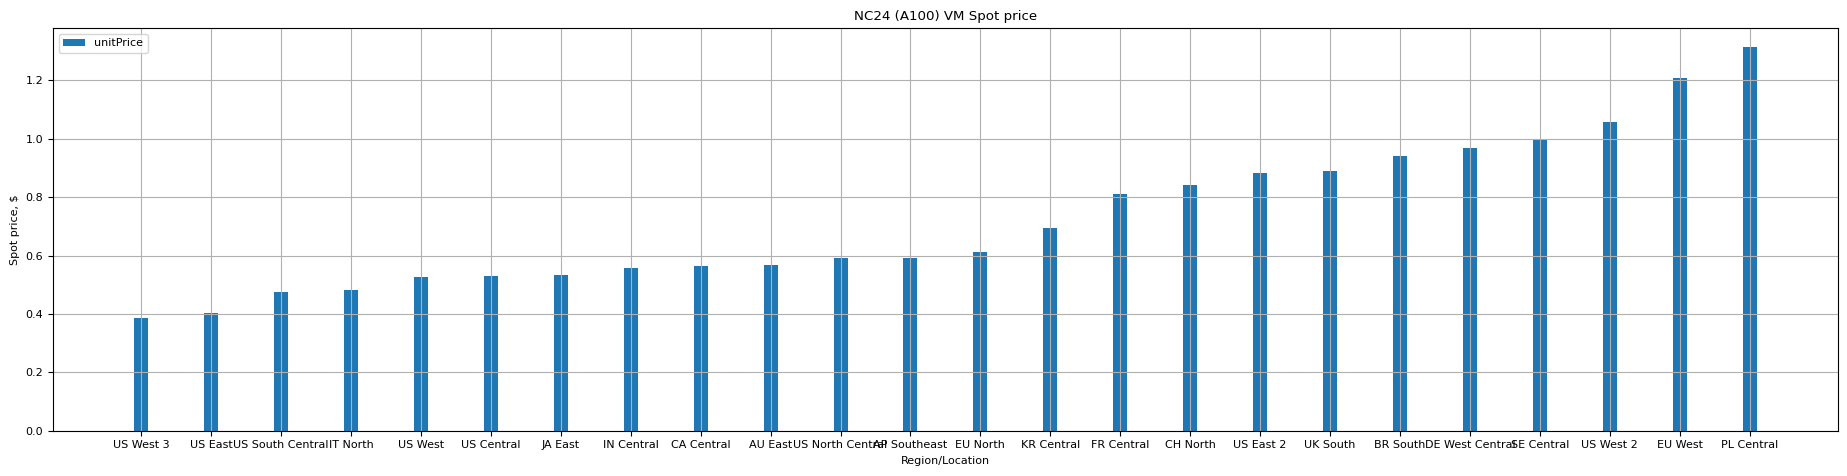

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.sort_values('unitPrice')

x_labels = [f"{location}" for location in df["location"]]

x = range(len(df))
width = 0.2

font = {"family": "normal", "size": 8}
plt.rc("font", size=8)

plt.bar(x, df["unitPrice"], width, label="unitPrice")
# plt.bar(x, df["retailPrice"], width, label="Avg")

plt.xlabel("Region/Location")
plt.ylabel("Spot price, $")
plt.title(f"NC24 (A100) VM Spot price")
plt.xticks([i  for i in x], x_labels)
plt.legend()
plt.grid(True)
plt.tight_layout(rect=[0.1, 0, 3, 1])
plt.show()